In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
df = pd.read_csv('C:/Users/User/Desktop/bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [24]:
df.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [25]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [26]:
med=np.median(df.duration)
print(med)

255.0


In [27]:
print(len(df))

11162


In [28]:
df['deposit']=df['deposit'].apply(lambda x:1 if x=='yes' else 0)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,1
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,1
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,1
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,1
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,1


In [29]:
df['default']=df['default'].apply(lambda x:1 if x=='yes' else 0)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,no,no,unknown,5,may,673,2,-1,0,unknown,1
5,42,management,single,tertiary,0,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,1
6,56,management,married,tertiary,0,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,1
7,60,retired,divorced,secondary,0,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,1
8,37,technician,married,secondary,0,1,yes,no,unknown,6,may,608,1,-1,0,unknown,1
9,28,services,single,secondary,0,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,1


In [30]:
df['housing']=df['housing'].apply(lambda x:1 if x=='yes' else 0)

In [31]:
df['loan']=df['loan'].apply(lambda x:1 if x=='yes' else 0)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1
5,42,management,single,tertiary,0,0,1,1,unknown,5,may,562,2,-1,0,unknown,1
6,56,management,married,tertiary,0,830,1,1,unknown,6,may,1201,1,-1,0,unknown,1
7,60,retired,divorced,secondary,0,545,1,0,unknown,6,may,1030,1,-1,0,unknown,1
8,37,technician,married,secondary,0,1,1,0,unknown,6,may,608,1,-1,0,unknown,1
9,28,services,single,secondary,0,5090,1,0,unknown,6,may,1297,3,-1,0,unknown,1


In [32]:
df = df.replace('secondary',2)
df = df.replace('primary',1)
df = df.replace('tertiary',3)
df = df.replace('unknown',0)
df = df.replace('divorced','single')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,2,0,2343,1,0,0,5,may,1042,1,-1,0,0,1
1,56,admin.,married,2,0,45,0,0,0,5,may,1467,1,-1,0,0,1
2,41,technician,married,2,0,1270,1,0,0,5,may,1389,1,-1,0,0,1
3,55,services,married,2,0,2476,1,0,0,5,may,579,1,-1,0,0,1
4,54,admin.,married,3,0,184,0,0,0,5,may,673,2,-1,0,0,1
5,42,management,single,3,0,0,1,1,0,5,may,562,2,-1,0,0,1
6,56,management,married,3,0,830,1,1,0,6,may,1201,1,-1,0,0,1
7,60,retired,single,2,0,545,1,0,0,6,may,1030,1,-1,0,0,1
8,37,technician,married,2,0,1,1,0,0,6,may,608,1,-1,0,0,1
9,28,services,single,2,0,5090,1,0,0,6,may,1297,3,-1,0,0,1


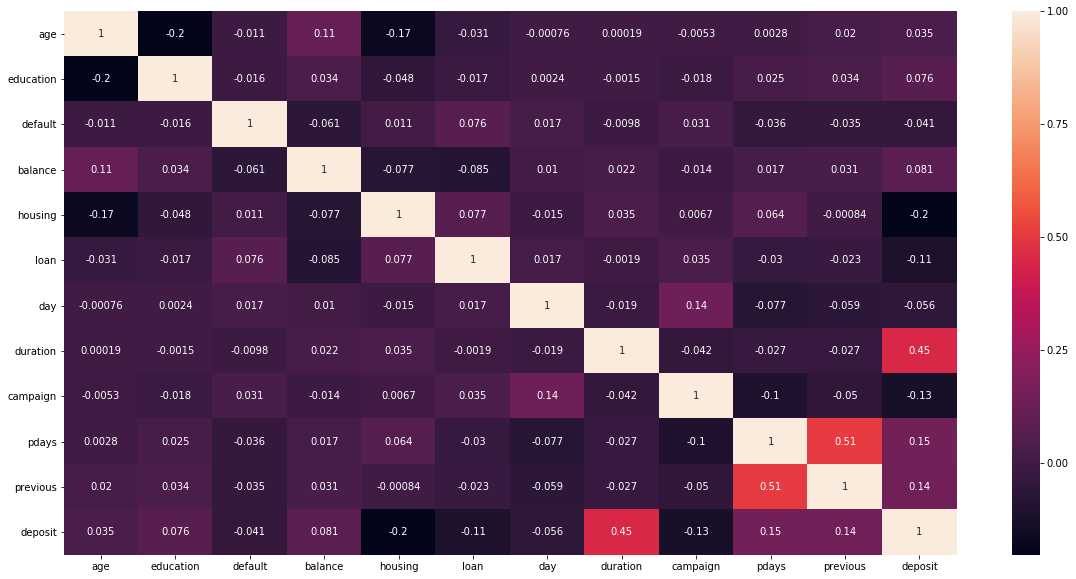

In [33]:
plt.figure(figsize=(20,10))
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)
plt.show()

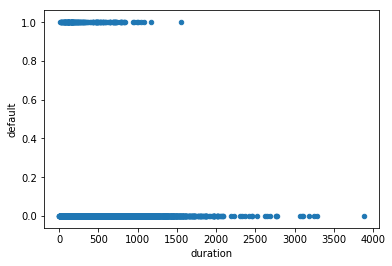

In [34]:
df.plot(x="duration",y="default",kind="scatter")
plt.show()

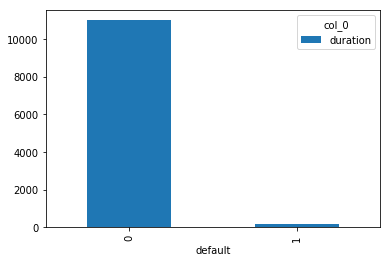

In [35]:
table1 = pd.crosstab(df["default"],'duration').plot(kind='bar', stacked=True)
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = pd.DataFrame(np.c_[df['education'], df['housing'],df['duration'],df['pdays'],df['loan']], columns = ['education','housing','duration','pdays','loan'])
Y = df['deposit']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [40]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, Y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.770


In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[1473  319]
 [ 437 1120]]
